**PROBLEM STATEMENT: BANK CUSTOMER CHURN PREDICTION**

<font size="3">The dataset on bank customer churn is widely employed to forecast customer attrition within the banking sector. It encompasses details about customers who have either departed from the bank or are currently active customers.</font>

**Features**
- **Customer ID:** A unique identifier for each customer
- **Surname:** The customer's surname or last name
- **Credit Score:** A numerical value representing the customer's credit score
- **Geography:** The country where the customer resides
- **Gender:** The customer's gender
- **Age:** The customer's age.
- **Tenure:** The number of years the customer has been with the bank
- **Balance:** The customer's account balance
- **NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)
- **HasCrCard:** Whether the customer has a credit card
- **IsActiveMember:** Whether the customer is an active member
- **EstimatedSalary:** The estimated salary of the customer
- **Exited:** Whether the customer has churned (1 = yes, 0 = no)(Target Variable)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import sklearn
from scipy import stats
import pickle
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_original = pd.read_csv('Churn_Modelling.csv')

In [3]:
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df_original.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [6]:
desc = pd.DataFrame(index = list(df_original))
desc['type'] = df_original.dtypes
desc['count'] = df_original.count()
desc['nunique'] = df_original.nunique()
desc['%unique'] = desc['nunique'] / len(df_original) * 100
desc['null'] = df_original.isnull().sum()
desc['%null'] = desc['null'] / len(df_original) * 100
desc['min'] = df_original.min()
desc['max'] = df_original.max()
desc

,type,count,nunique,%unique,null,%null,min,max
RowNumber,int64,10000,10000,100.00,0,0.0,1,10000
CustomerId,int64,10000,10000,100.00,0,0.0,15565701,15815690
Surname,object,10000,2932,29.32,0,0.0,Abazu,Zuyeva
CreditScore,int64,10000,460,4.60,0,0.0,350,850
Geography,object,10000,3,0.03,0,0.0,France,Spain
Gender,object,10000,2,0.02,0,0.0,Female,Male
Age,int64,10000,70,0.70,0,0.0,18,92
Tenure,int64,10000,11,0.11,0,0.0,0,10
Balance,float64,10000,6382,63.82,0,0.0,0.0,250898.09
NumOfProducts,int64,10000,4,0.04,0,0.0,1,4


**Insight**

From this table, we can confirm that the data has 14 features and 10,000 observations. We also know that nine features are integers, two are floats, and three are strings. Finally, we can tell that there are no null values because there are 10,000 observations, and each column has 10,000 non-null values.

In [7]:
print(df_original['Exited'].value_counts())
print()
print(df_original['Exited'].value_counts(normalize=True))

0    7963
1    2037
Name: Exited, dtype: int64

0    0.7963
1    0.2037
Name: Exited, dtype: float64


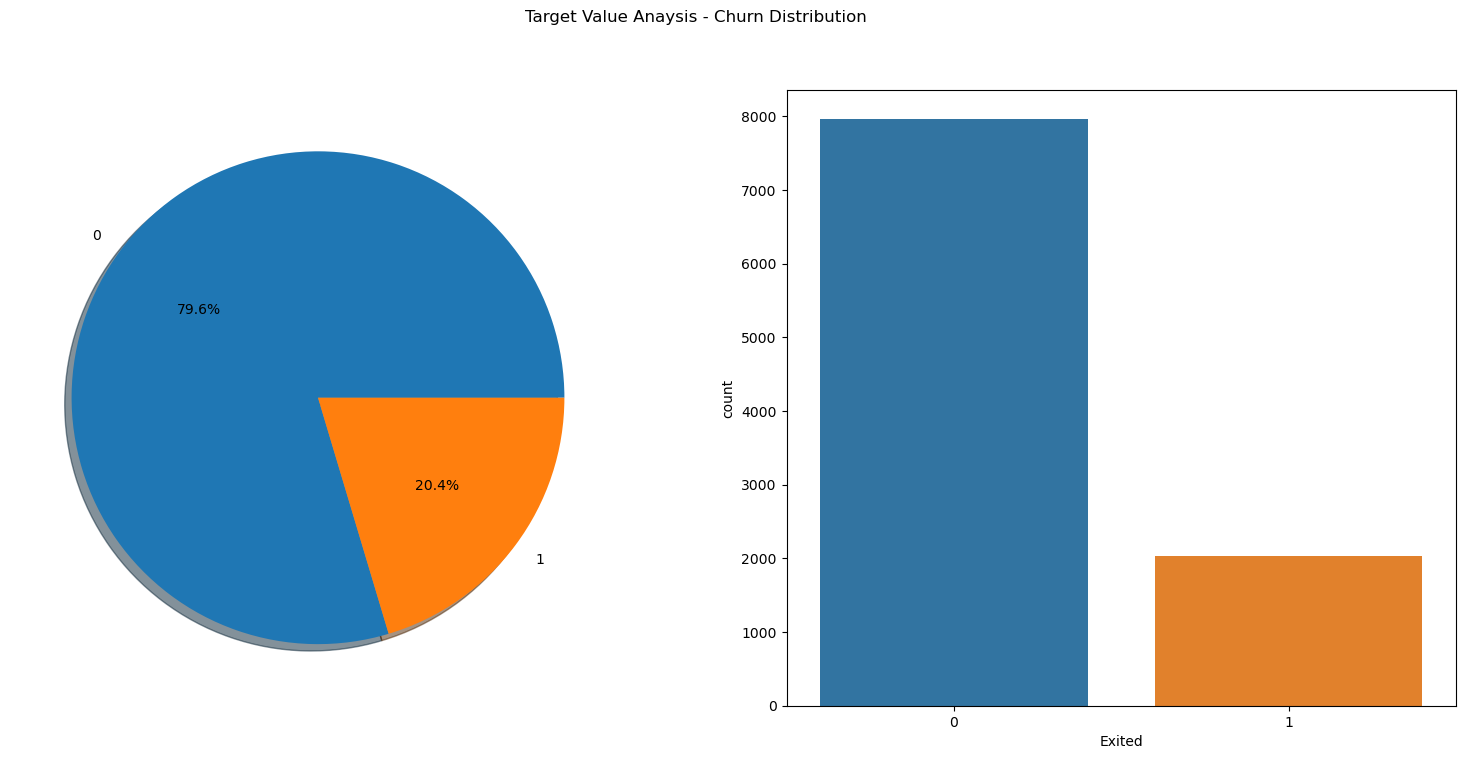

In [8]:
f,ax=plt.subplots(1,2,figsize=(19,8))
df_original['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=df_original,ax=ax[1])
# ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Churn Distribution')
plt.show()

**Insight**

- The dataset is highly imbalanced, about 80% of the values in the target columm belong to class 0, and about 20% of the values belong to class 1. In other words, about 80% of customers represented by this data retained, and about 20% exited.
- In a real life also we only care about the persons or the people who are quitting or leaving (Exited) the bank and we only want to analyse the patterns of those people.

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df_original.columns if df_original[feature].dtype != 'O']
categorical_features = [feature for feature in df_original.columns if df_original[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

We have 3 categorical features : ['Surname', 'Geography', 'Gender']


In [10]:
# Unique value counts for each column
unique_counts = df_original.nunique()

# Threshold to distinguish continuous and categorical
threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'outcome' from categorical since it's our target variable
if 'Exited' in categorical_vars:
    categorical_vars.remove('Exited')
if 'CustomerId' in continuous_vars:
    continuous_vars.remove('CustomerId')
if 'RowNumber' in continuous_vars:
    continuous_vars.remove('RowNumber')
if 'Surname' in continuous_vars:
    continuous_vars.remove('Surname')


print(f"Categorical Variables: {categorical_vars}")
print(f"Continous/Numerical Variables: {continuous_vars}")

Categorical Variables: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Continous/Numerical Variables: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


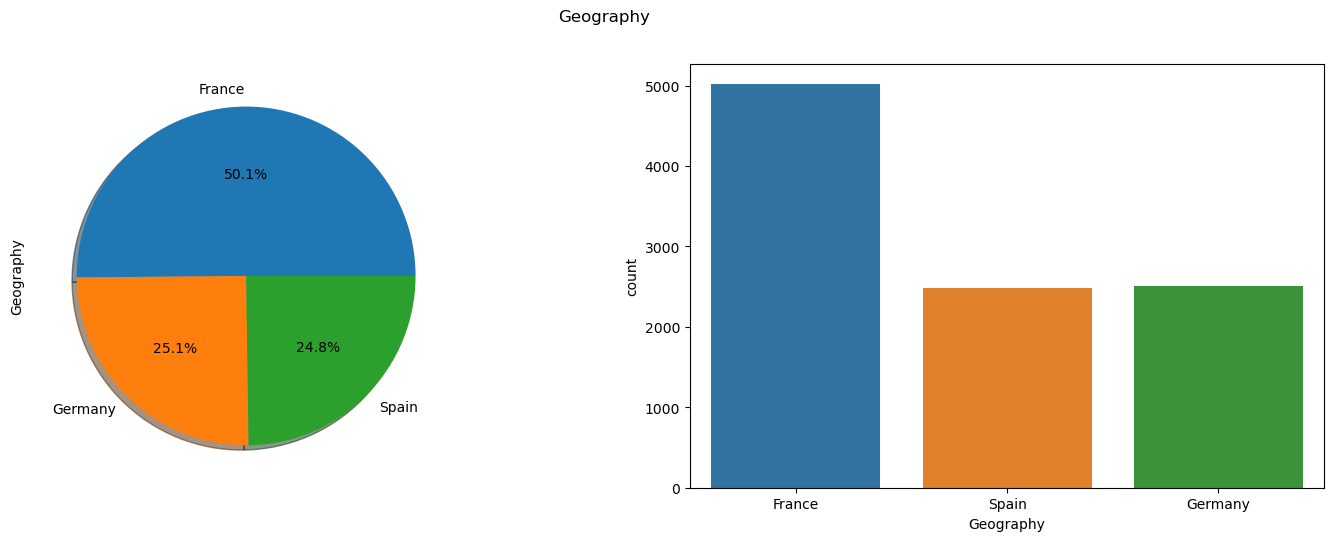

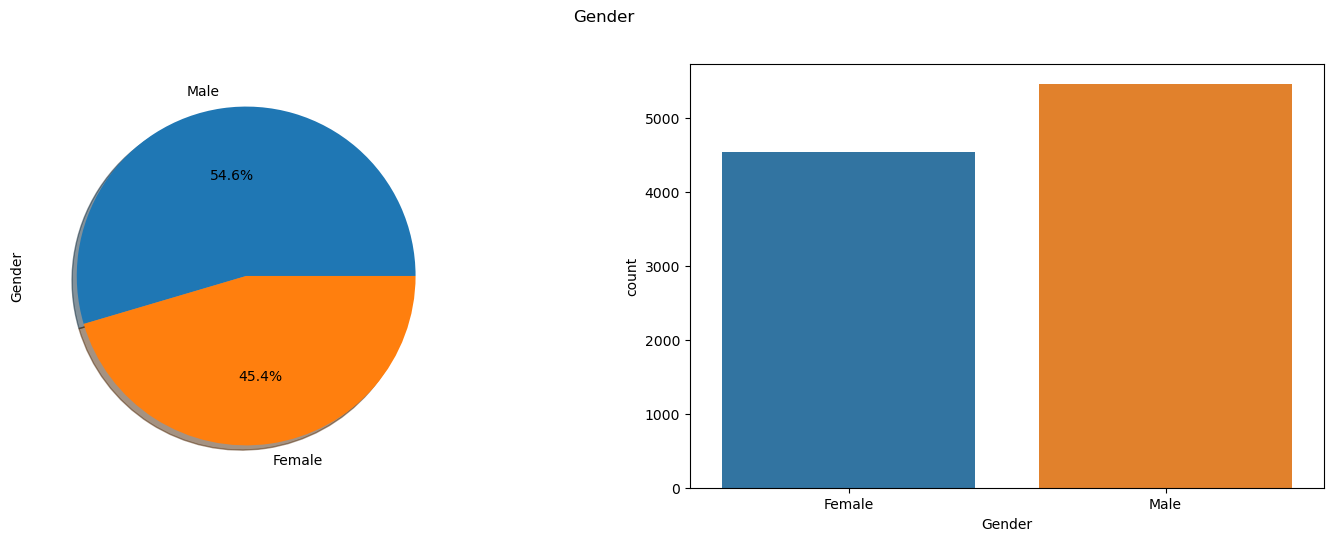

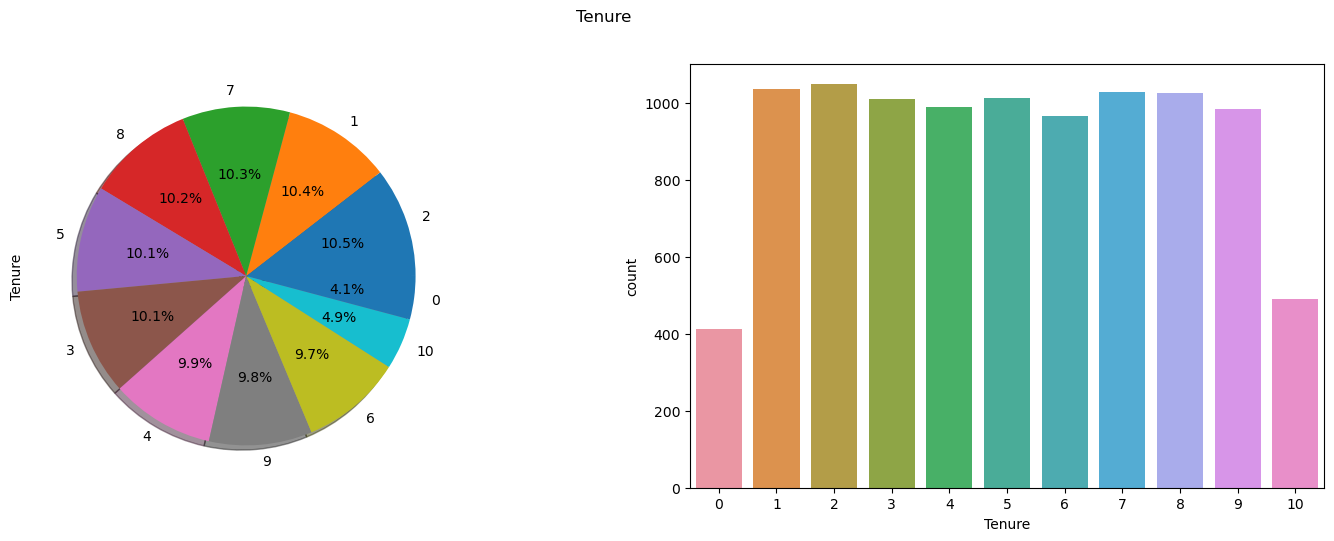

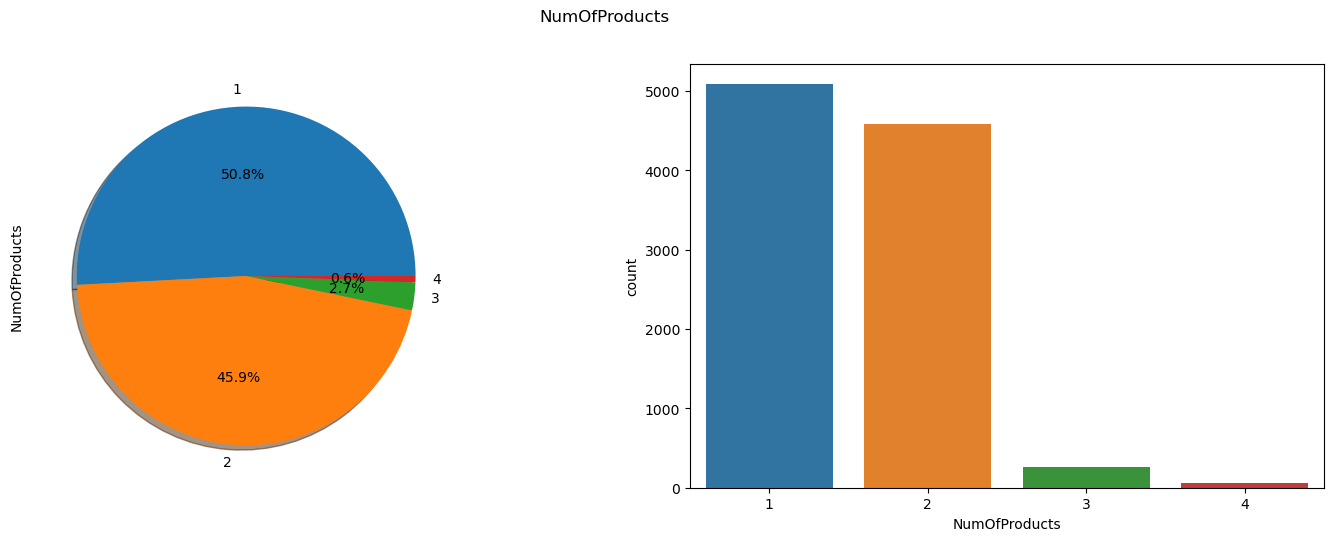

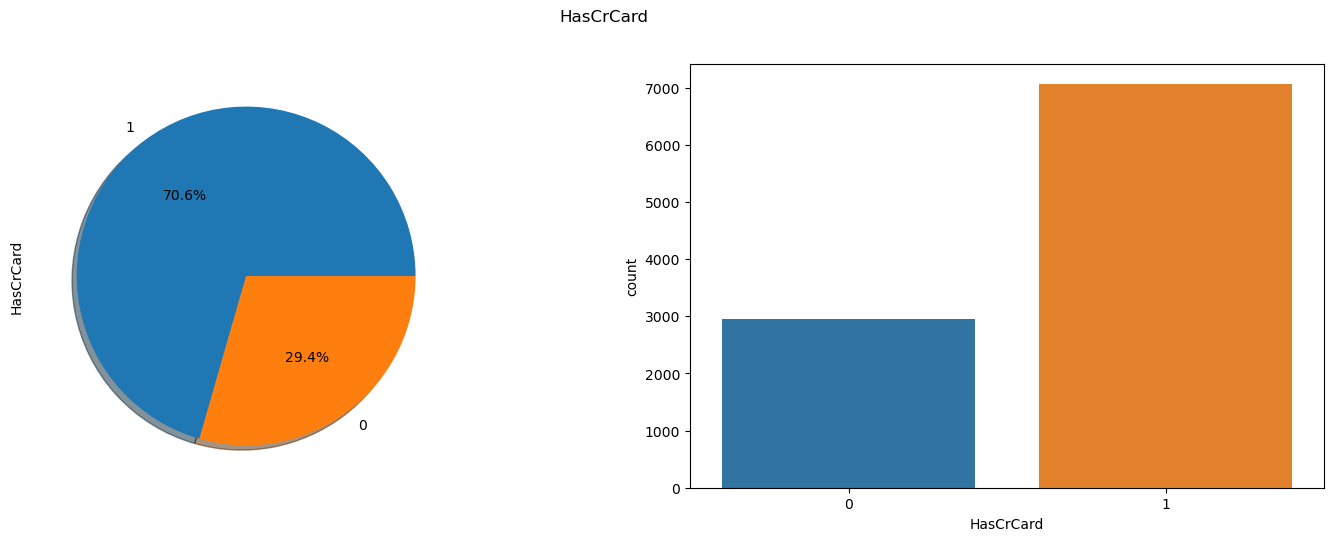

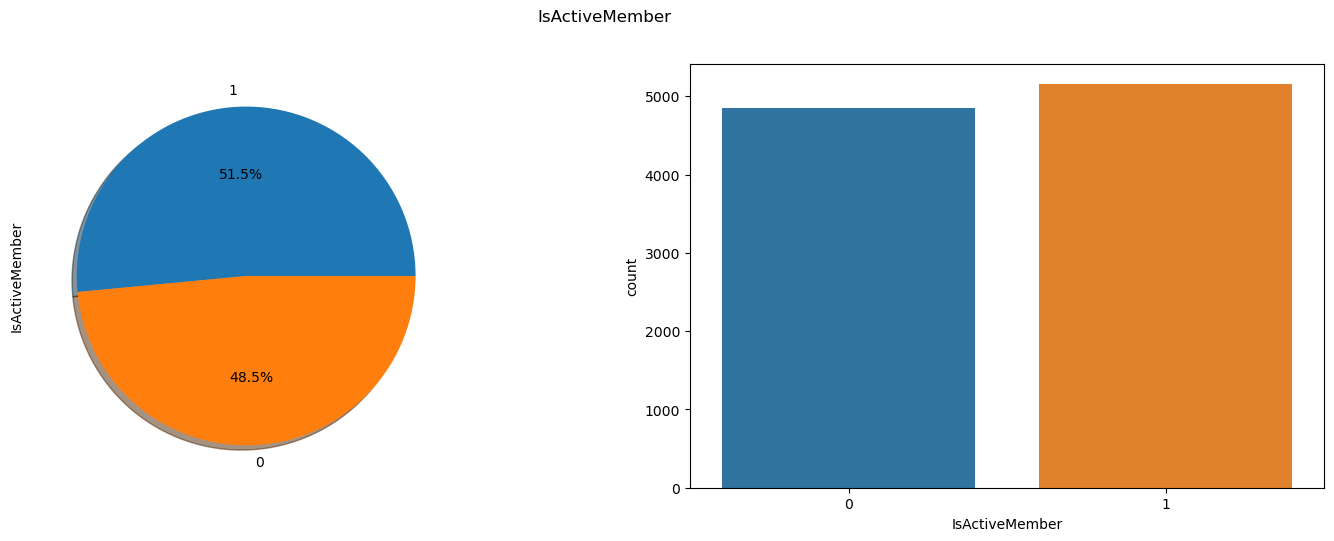

In [11]:
for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    df_original[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=df_original,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

### Some Observations from above plots:

- Some of the variables like `IsActiveMember`, `Tenure` and `Gender` are almost equaly distributed while the other variables like `HasCrCard`, `NumOfProducts`, and `Gender` are not equaly distributed.

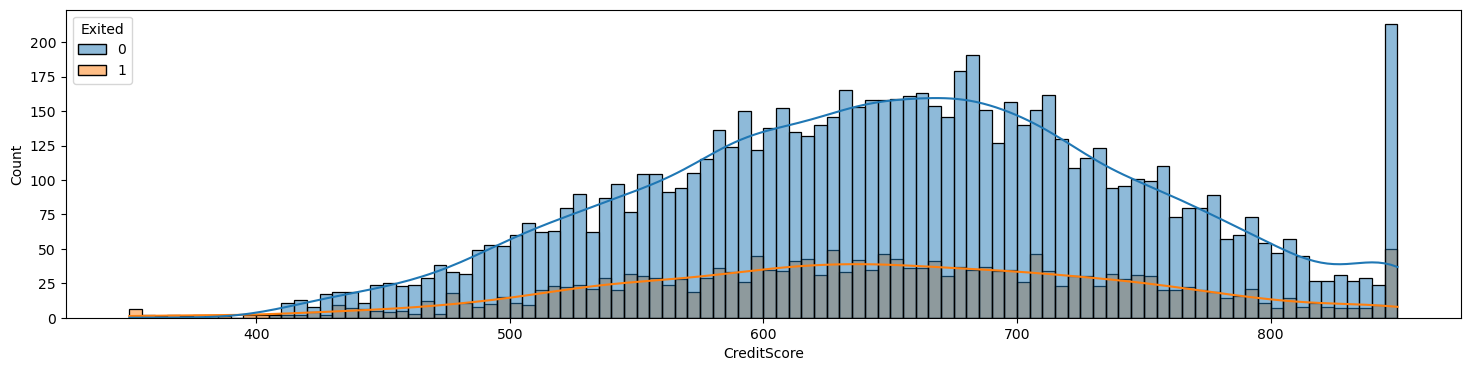

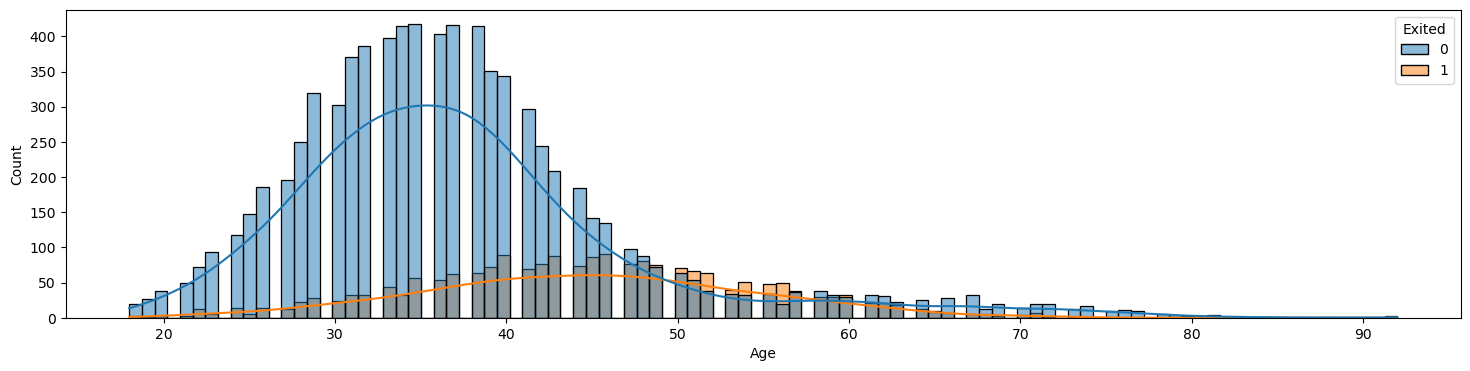

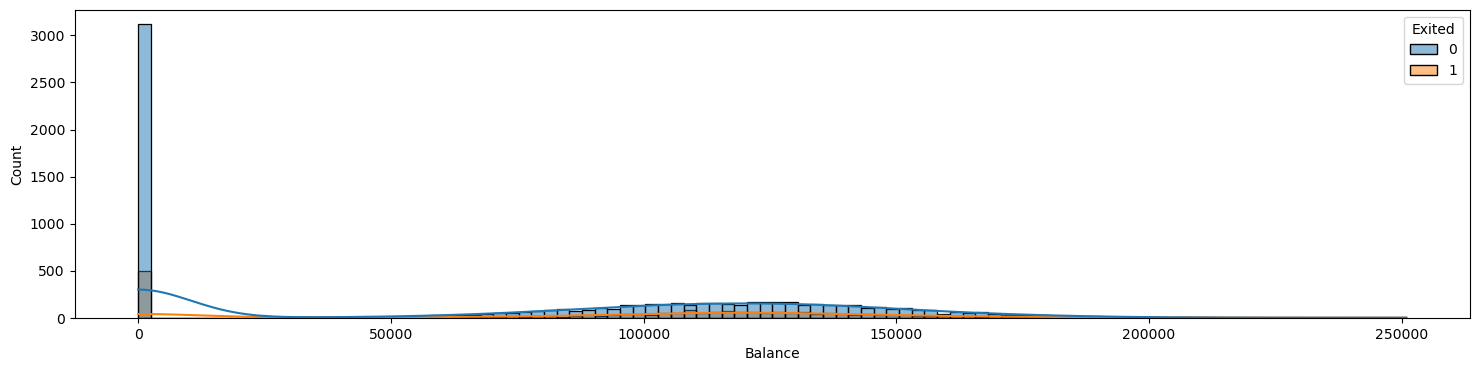

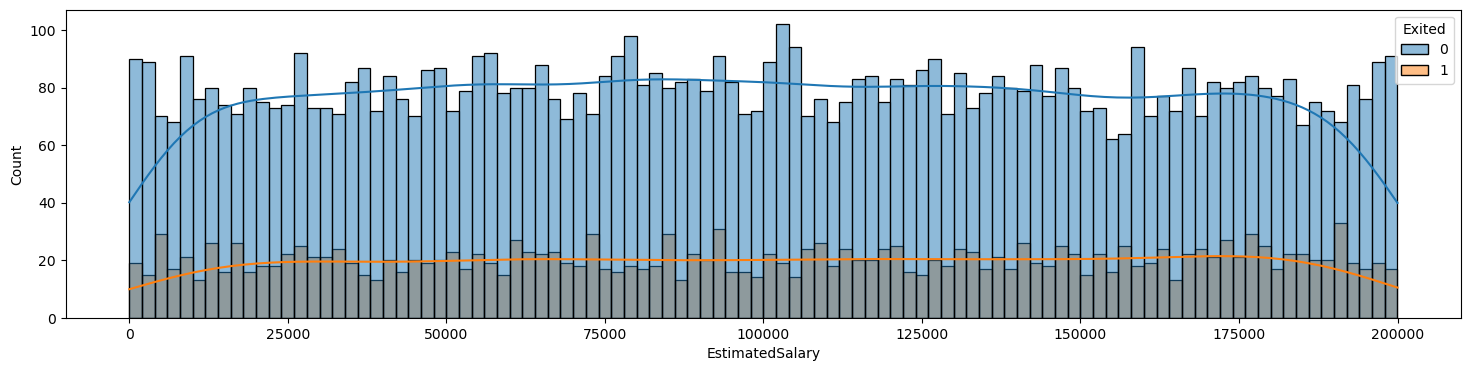

In [12]:
for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=df_original, x=column, hue="Exited", bins=100, kde=True)
    plt.show()

### Some Observations from above plots:

- Majority of the data from `balance` variable is 0 only which makes the distribution skewed to 0 side.
- Other variables also show the skewness in the distributions.
- Distribution of data for both classes is almost same for all the variables.

In [13]:
# Calculate median values of all columns for churned and retained
df_original.groupby('Exited').median(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5042.0,15691543.0,653.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,4871.0,15688963.0,646.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


In [14]:
df_original.groupby(['Exited', 'NumOfProducts']).size()

Exited  NumOfProducts
0       1                3675
        2                4242
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
dtype: int64

In [15]:
df_original.groupby('Exited')['NumOfProducts'].value_counts(normalize=True)

Exited  NumOfProducts
0       2                0.532714
        1                0.461509
        3                0.005777
1       1                0.691703
        2                0.170839
        3                0.108002
        4                0.029455
Name: NumOfProducts, dtype: float64

In [16]:
df_original.groupby(['Exited', 'HasCrCard']).size()

Exited  HasCrCard
0       0            2332
        1            5631
1       0             613
        1            1424
dtype: int64

In [17]:
df_original.groupby('Exited')['HasCrCard'].value_counts(normalize=True)

Exited  HasCrCard
0       1            0.707146
        0            0.292854
1       1            0.699067
        0            0.300933
Name: HasCrCard, dtype: float64

In [18]:
df_original.groupby(['Exited', 'IsActiveMember']).size()

Exited  IsActiveMember
0       0                 3547
        1                 4416
1       0                 1302
        1                  735
dtype: int64

In [19]:
df_original.groupby('Exited')['IsActiveMember'].value_counts(normalize=True)

Exited  IsActiveMember
0       1                 0.554565
        0                 0.445435
1       0                 0.639175
        1                 0.360825
Name: IsActiveMember, dtype: float64

- customers who retained averaged more on credit score than churned customers, but churned customers have more balance accounts and estimated salary than retained customers.
- the median retained customers were active members and had more multiple product such as saving account and credit card than churned customers.
- it seems that churned customers were people around middle age.

### Data exploration and hypothesis testing

We are interested in the relationship between churned customers and the number of credit scores. One approach is to look at the average number of credit score for each customers churned status. 

In [20]:
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df_original.groupby('Exited')['CreditScore'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

Based on the averages shown, it appears that retained customers have a higher number of credit score on average than churned customers. However, this difference might arise from random sampling, rather than being a true difference in the number of credit score. To assess whether the difference is statistically significant, we can conduct a hypothesis test.

Our goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Churned customers vs. Retained customers).

**Hypotheses:**

null hypothesis ($H_0$): There is no difference in average number of credit score between customer who has churned and customers who has retained.

alternative hypothesis ($H_A$): There is a difference in average number of credit score between customer who has churned and customers who has retained.

In [22]:
# For this analysis, the significance level is 5%

significance_level = 0.05
significance_level

0.05

In [23]:
# 1. Isolate the `CreditScore` column for churned customers.
churned = df_original[df_original['Exited'] == 1]['CreditScore']

# 2. Isolate the `CreditScore` column for retained customers.
retained = df_original[df_original['Exited'] == 0]['CreditScore']

# 3. Perform the t-test
stats.ttest_ind(a=churned, b=retained, equal_var=False)

Ttest_indResult(statistic=-2.6346605436575796, pvalue=0.008464728991832862)

With a p-value (0.008) of less than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-2.634), **reject the null hypothesis in favor of the alternative hypothesis**.

Therefore, we can conclude at the 5% significance level that  there is a statistically significant difference in average number of credit score between customer who has churned and customers who has retained.

We are also interested in the relationship between gender type and the number of credit scores. One approach is to look at the average number of credit score for each gender type.

In [24]:
# 1. Create `map_dictionary`
map_dictionary = {'Female': 0, 'Male': 1}

# 2. Create new `device_type` column
df_original['gender_type'] = df_original['Gender']

# 3. Map the new column to the dictionary
df_original['gender_type'] = df_original['gender_type'].map(map_dictionary)

df_original['gender_type'].head()

0    0
1    0
2    0
3    0
4    0
Name: gender_type, dtype: int64

In [25]:
df_original.groupby('gender_type')['CreditScore'].mean()

gender_type
0    650.831389
1    650.276892
Name: CreditScore, dtype: float64

In [26]:
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_type
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


Based on the averages shown, it appears that female customers have a slightly higher number of credit score on average than male customers. However, this difference might arise from random sampling, rather than being a true difference in the number of credit score. To assess whether the difference is statistically significant, we can conduct a hypothesis test.

**Hypotheses:**

null hypothesis ($H_0$): There is no difference in average number of credit score between male customers and female customers.

alternative hypothesis ($H_A$): There is a difference in average number of credit score between male customers and female customers.

In [27]:
# 1. Isolate the `CreditScore` column for Male customers.
Male = df_original[df_original['gender_type'] == 1]['CreditScore']

# 2. Isolate the `CreditScore` column for Female customers.
Female = df_original[df_original['gender_type'] == 0]['CreditScore']

# 3. Perform the t-test
stats.ttest_ind(a=Male, b=Female, equal_var=False)

Ttest_indResult(statistic=-0.28557043108373503, pvalue=0.7752132738233501)

Since the p-value (0.775) is larger than the chosen significance level 0.05 (5%), we **fail to reject the null hypothesis**. We conclude that there is **not** a statistically significant difference in the average number of credit score between male customers and female customers.

### Feature selection ###

In [28]:
# Create a new df that drops RowNumber, CustomerId, Surname, and Gender cols
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], 
                            axis=1)

In [29]:
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_type
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


### Feature Extraction ###

Let's create a `Loyalty` feature that represents the percentage of each customer's life that they were customers. We can do this by dividing `Tenure` by `Age`:
​
$$\text{Loyalty} = \frac{\text{Tenure}}{\text{Age}}$$
  </br> 
The intuition here is that people who have been customers for a greater proportion of their lives might be less likely to churn. 

In [30]:
# Create Loyalty variable
churn_df['Loyalty'] = churn_df['Tenure'] / churn_df['Age']

In [31]:
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_type,Loyalty
0,619,France,42,2,0.00,1,1,1,101348.88,1,0,0.047619
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0,0.024390
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0,0.190476
3,699,France,39,1,0.00,2,0,0,93826.63,0,0,0.025641
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0,0.046512


In [32]:
churn_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
Exited,10000.000000,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000
gender_type,10000.000000,0.545700,0.497932,0.000000,0.000000,1.000000,1.000000,1.000000


In [33]:
# Group data by `Exited` and calculate the medians
medians_by_label = churn_df.groupby('Exited').median(numeric_only=True)
print('Median Loyalty:')

medians_by_label['Tenure'] / medians_by_label['Age']

Median Loyalty:


Exited
0    0.138889
1    0.111111
dtype: float64

In [34]:
# Print unique values of Geography col
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [35]:
# Dummy encode categorical variables
churn_df = pd.get_dummies(churn_df, drop_first=True)

In [36]:
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_type,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0.046512,0,1


### Correlation Analysis:

Correlation is the statistical analysis of the relationship or dependency between two variables. Correlation allows us to study both the strength and direction of the relationship between two sets of variables.

There are mainly 3 types of Correlations:

- Positive Correlation: Two variables are said to be positively correlated when their values move in the same direction.
- Neutral Correlation: No relationship in the change of variables X and Y. In this case, the values are completely random and do not show any sign of correlation.
- Negative Correlation: Finally, variables X and Y will be negatively correlated when their values change in opposite directions.

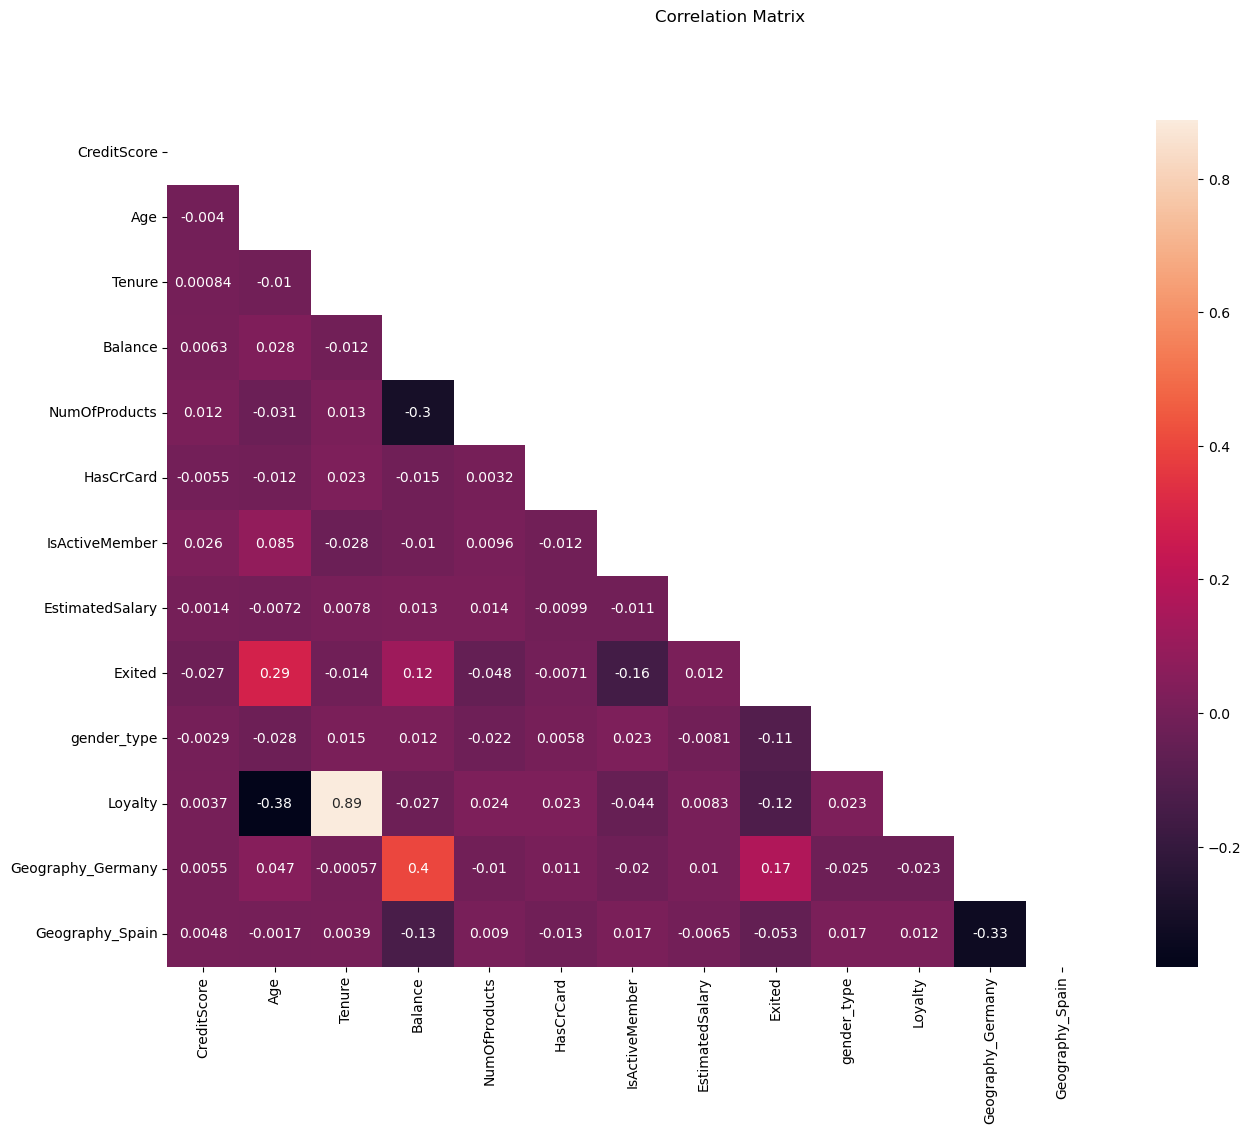

In [37]:
corr_matrix=churn_df.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()